We sourced our quarterly and annual company financial statements from the Apple investor relations website. We downloaded them as word documents.
We sourced our weekly stock prices from Yahoo financial. We were precisely looking for the opening price of Apple stock on Monday morning to view the movement intraweekend due to news. We want to compare the price movement to the news outcomes over the weekend and research reports that are disseminated on Sunday.
We sourced our research analyst reports from ThomsonOne. We found one analyst, Sherri Scribner from Deutsche Bank who produced a weekly news report on Apple and we downloaded available reports from August 2017 to September 2018. 

Data Processing:
Importing Apple Financial Statements and and Deutsche Bank Weekly Apple News Reports as word documents 

In [1]:
import os
import docx2txt
import glob
import pandas as pd  
import datetime

os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project/DeutscheProcessed")

Date = []
Descriptions = []
name = []

for file in glob.glob('*.docx'):
    Date.append(file[:8])
    in_text=docx2txt.process(file)
    new_in_text=in_text.replace("\n", " ").lower()
    Descriptions.append(new_in_text)
    name.append(file)

Dates=[]
for d in Date:
    new_d=datetime.datetime.strptime(d,'%m%d%Y').strftime('%m/%d/%y')
    Dates.append(new_d)

data = pd.DataFrame(
    {  'Date': Dates,
        'Descriptions': Descriptions,
     'Name': name,
    })

data.dtypes

Date            object
Descriptions    object
Name            object
dtype: object

Formatting date column

In [2]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values(by='Date')
data.head()

,Date,Descriptions,Name
27,2017-08-01,1 august 2017 it hardware and supply chain ap...,08012017.docx
45,2017-08-04,4 august 2017 it hardware and supply chain sc...,08042017.docx
16,2017-08-11,11 august 2017 it hardware and supply chain s...,08112017.docx
36,2017-08-18,18 august 2017 it hardware and supply chain s...,08182017.docx
28,2017-09-08,8 september 2017 it hardware and supply chain...,09082017.docx


Importing Apple Financial Statements

In [3]:
os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project/AppleProcessed")

Date = []
Descriptions = []
name = []

for file in glob.glob('*.docx'):
    Date.append(file[:8])
    in_text=docx2txt.process(file)
    new_in_text=in_text.replace("\n", " ").lower()
    Descriptions.append(new_in_text)
    name.append(file)

Dates=[]
for d in Date:
    new_d=datetime.datetime.strptime(d,'%m%d%Y').strftime('%m/%d/%y')
    Dates.append(new_d)

datax = pd.DataFrame(
    {  'Date': Dates,
        'Descriptions': Descriptions,
     'Name': name,
    })

datax.dtypes

Date            object
Descriptions    object
Name            object
dtype: object

In [4]:
datax['Date'] = pd.to_datetime(datax['Date'])
datax = datax.sort_values(by='Date')
datax.head()

,Date,Descriptions,Name
0,2017-06-03,apple inc. notes to condensed consolidated fi...,06032017.docx
5,2017-08-02,apple inc. notes to condensed consolidated fi...,08022017.docx
6,2017-11-03,this annual report on form 10-k (“form 10-k”) ...,11032017.docx
1,2018-02-02,apple inc. notes to condensed consolidated fi...,02022018.docx
4,2018-06-02,apple inc. notes to condensed consolidated fi...,06022018.docx


Importing Apple Historical Stock Prices

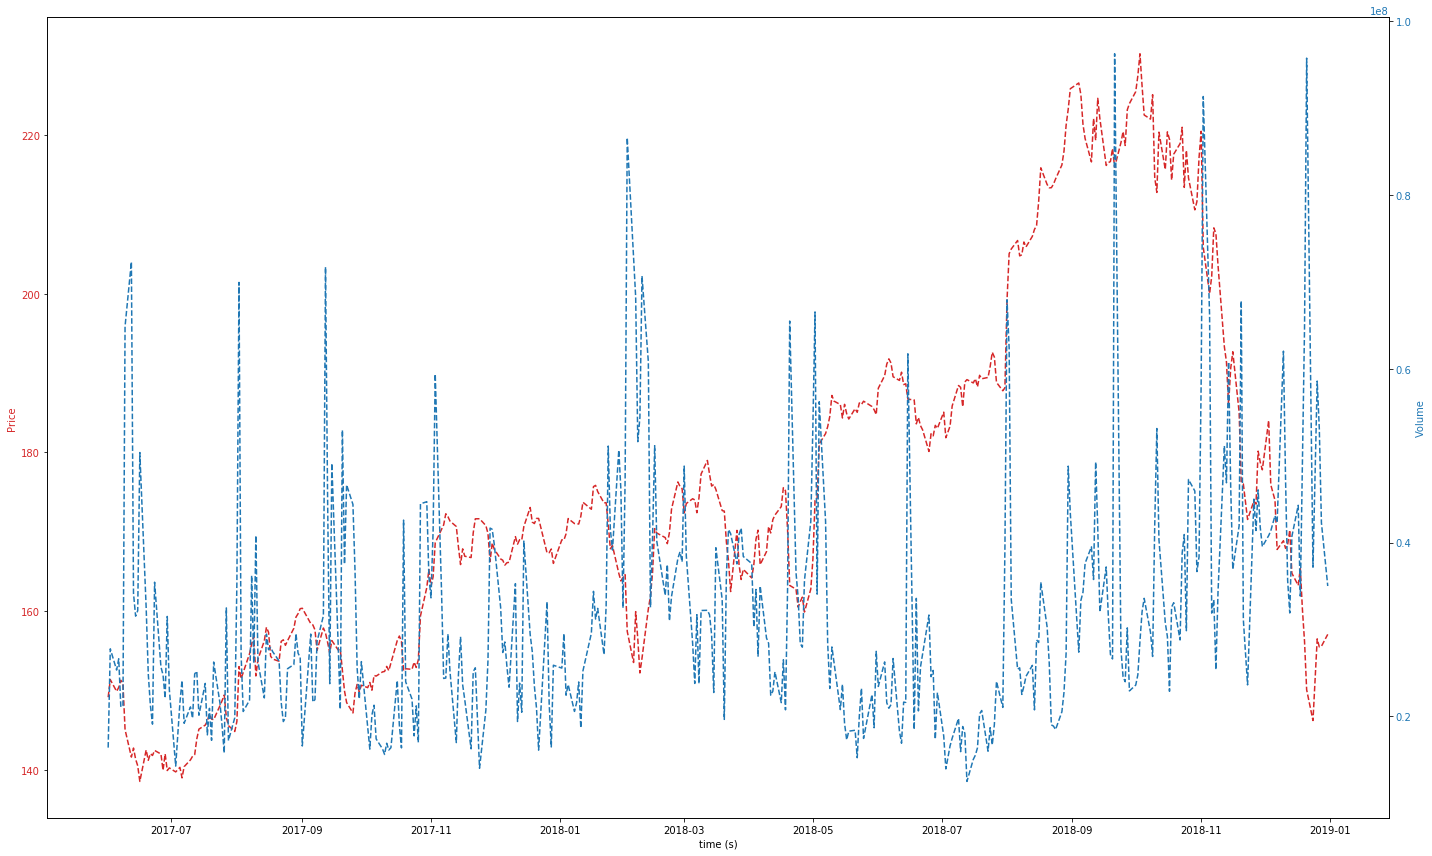

In [70]:
import matplotlib.pyplot as plt


os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project")
datay= pd.read_csv('AAPL.csv')
datay['Date'] = pd.to_datetime(datay['Date'])

fig, a1 = plt.subplots(figsize=(20, 12))

color = 'tab:red'
a1.set_xlabel('time (s)')
a1.set_ylabel('Price', color=color)
a1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
a1.tick_params(axis='y', labelcolor=color)

a2 = a1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
a2.set_ylabel('Volume', color=color)  # we already handled the x-label with ax1
a2.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
a2.tick_params(axis='y', labelcolor=color)


fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.savefig('AAPLPricevVolume.png')

In [6]:
datay.head()

,Date,Adj Close,Volume
0,2017-06-01,149.145844,16404100
1,2017-06-02,151.356079,27770700
2,2017-06-05,149.876099,25331700
3,2017-06-06,150.382416,26624900
4,2017-06-07,151.278198,21069600


Normalizing the text

In [7]:
os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project")
%run ./Text_Normalization_Function.ipynb

Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), 

In [8]:
test_corpus = []
test_corpus.append(str(new_in_text))
normalized_test_corpus = normalize_corpus(test_corpus)

print("Original corpus:  ", test_corpus,"\n")

Original corpus:   ['this annual report on form 10-k (“form 10-k”) contains forward-looking statements, within the meaning of the private securities litigation reform act of 1995, that involve risks and uncertainties. many of the forward-looking statements are located in part ii, item\xa07 of this form 10-k under the heading “management’s discussion and analysis of financial condition and results of operations.” forward-looking statements provide current expectations of future events based on certain assumptions and include any statement that does not directly relate to any historical or current fact. forward-looking statements can also be identified by words such as “future,” “anticipates,” “believes,” “estimates,” “expects,” “intends,” “plans,” “predicts,” “will,” “would,” “could,” “can,” “may,” and similar terms. forward-looking statements are not guarantees of future performance and the company’s actual results may differ significantly from the results discussed in the forward-look

In [9]:
print("Processed corpus: ", normalize_corpus(test_corpus))

Processed corpus:  ['annual report form k form k contain forward looking statement within meaning private security litigation reform act involve risk uncertainty many forward looking statement locate part ii item form k heading management discussion analysis financial condition result operation forward looking statement provide current expectation future event base certain assumption include statement directly relate historical current fact forward looking statement identify word future anticipates believe estimate expect intend plan predicts could may similar term forward looking statement guarantee future performance company actual result may differ significantly result discuss forward looking statement factor might cause difference include limit discuss part item 1a form k heading risk factor incorporate herein reference information present herein base companys fiscal calendar unless otherwise state reference particular year quarter month period refer companys fiscal year end septem

Using two lexicon models for comparison: VADER and another provided by Prof Bill McDonald, professor of Finance at the University of Notre Dame

In [10]:
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/snail/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [11]:
print("\nScores (Vander):", analyzer.polarity_scores(new_in_text),"\n")


Scores (Vander): {'neg': 0.056, 'neu': 0.818, 'pos': 0.125, 'compound': 1.0} 



Using unigrams and Prof Bill McDonald Dictionary https://sraf.nd.edu/

In [12]:
import re
from sklearn import preprocessing

#Importing positive words
os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project")
pos_words = pd.read_excel("LoughranMcDonald_SentimentWordLists_2018.xlsx", sheetname="Positive")
neg_words = pd.read_excel("LoughranMcDonald_SentimentWordLists_2018.xlsx", sheetname="Negative")
neg_words.head()

,ABANDON
0,ABANDONED
1,ABANDONING
2,ABANDONMENT
3,ABANDONMENTS
4,ABANDONS


In [13]:
positive = [pos.strip().lower() for pos in pos_words[pos_words.columns[0]]]
posws = [word for word in str(normalize_corpus(test_corpus)).split(" ") if word in positive]
print(len(posws))
print(posws)

275
['best', 'innovative', 'innovative', 'superior', 'greatly', 'enhance', 'innovative', 'great', 'great', 'good', 'enhance', 'enhanced', 'improve', 'enhance', 'improvement', 'proactive', 'enhanced', 'enable', 'easy', 'reward', 'enable', 'enhanced', 'enable', 'enhancement', 'innovative', 'enhance', 'effective', 'advantage', 'improve', 'desirable', 'enhance', 'enhance', 'effective', 'achievement', 'enable', 'innovation', 'strong', 'opportunity', 'collaborate', 'advancement', 'innovative', 'superior', 'innovation', 'successfully', 'enhance', 'success', 'innovative', 'innovation', 'achieve', 'good', 'strengthening', 'gain', 'improvement', 'advancement', 'successfully', 'innovative', 'innovative', 'attractive', 'advantage', 'collaborate', 'great', 'improve', 'advantage', 'enabled', 'improve', 'advantage', 'successfully', 'enhance', 'successfully', 'success', 'successful', 'effective', 'enhance', 'improve', 'good', 'good', 'benefit', 'innovative', 'successfully', 'benefit', 'resolve', 'enab

In [14]:
negative = [neg.strip().lower() for neg in neg_words[neg_words.columns[0]]]
negs = [word for word in str(normalize_corpus(test_corpus)).split(" ") if word in negative]
print(len(negs))
print(negs)

617
['litigation', 'force', 'critical', 'cut', 'accidental', 'damage', 'force', 'force', 'critical', 'force', 'confront', 'adversely', 'downward', 'loss', 'shortage', 'adversely', 'delay', 'delay', 'adversely', 'adversely', 'shortage', 'adversely', 'adversely', 'unable', 'unknowingly', 'infringe', 'infringe', 'adversely', 'penalty', 'decline', 'shortage', 'adversely', 'adversely', 'postpone', 'unemployment', 'volatility', 'negative', 'decline', 'adverse', 'unemployment', 'adversely', 'turmoil', 'failure', 'volatility', 'insolvency', 'instability', 'inability', 'delay', 'inability', 'failure', 'loss', 'impairment', 'volatility', 'volatility', 'unable', 'downward', 'infringe', 'unable', 'infringe', 'adversely', 'loss', 'cut', 'volatile', 'defect', 'deficiency', 'weaken', 'cancellation', 'obsolete', 'cancellation', 'impairment', 'impairment', 'unpredictable', 'obsolescence', 'volatile', 'incorrectly', 'insufficient', 'shortage', 'suffer', 'poor', 'failure', 'adversely', 'shortage', 'delay

In [15]:
sentiment=len(posws)/(len(negs)+len(posws))
print(sentiment)

0.30829596412556054


Using unigrams and the Bing Liu dictionary https://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html

In [16]:
os.chdir("/Users/snail/Desktop/Olin MBA/B63MGT561 Text Mining/Final Project/BingLiu")

b_pos_words = pd.read_fwf('positive-words.txt', header=None)
b_neg_words = pd.read_fwf('negative-words.txt', header=None)
b_pos_words.head(5)

,0
0,a+
1,abound
2,abounds
3,abundance
4,abundant


In [17]:
b_positive = [pos.strip().lower() for pos in b_pos_words[b_pos_words.columns[0]]]
b_posws = [word for word in str(normalize_corpus(test_corpus)).split(" ") if word in b_positive]
print(len(b_posws))
print(b_posws)




1077
['reform', 'guarantee', 'variety', 'variety', 'support', 'well', 'variety', 'compatible', 'best', 'innovative', 'leverage', 'innovative', 'superior', 'ease', 'seamless', 'support', 'complement', 'knowledgeable', 'enhance', 'effectively', 'support', 'innovative', 'great', 'well', 'great', 'good', 'dynamic', 'regard', 'intelligent', 'qualify', 'enhance', 'super', 'available', 'available', 'work', 'advanced', 'enhanced', 'work', 'portable', 'qualify', 'available', 'portable', 'compatible', 'capability', 'improve', 'enhance', 'intuitive', 'integrated', 'support', 'support', 'improvement', 'proactive', 'enhanced', 'capability', 'available', 'free', 'available', 'free', 'available', 'available', 'available', 'unlimited', 'available', 'support', 'support', 'comprehensive', 'well', 'protection', 'support', 'available', 'available', 'easy', 'secure', 'qualify', 'support', 'reward', 'variety', 'available', 'available', 'compatible', 'support', 'dynamic', 'enhanced', 'enhancement', 'capabili

In [18]:
b_negative = [neg.strip().lower() for neg in b_neg_words[b_neg_words.columns[0]]]
b_negs = [word for word in str(normalize_corpus(test_corpus)).split(" ") if word in b_negative]
print(len(b_negs))
print(b_negs)

941
['risk', 'limit', 'risk', 'critical', 'cloud', 'accidental', 'damage', 'fall', 'critical', 'confront', 'aggressive', 'aggressive', 'gross', 'aggressive', 'loss', 'limited', 'shortage', 'delay', 'delay', 'risk', 'shortage', 'unable', 'infringe', 'infringe', 'penalty', 'decline', 'limited', 'limited', 'shortage', 'inactive', 'risk', 'risk', 'risk', 'unknown', 'limited', 'risk', 'volatility', 'negative', 'decline', 'adverse', 'turmoil', 'failure', 'volatility', 'instability', 'inability', 'delay', 'inability', 'failure', 'restriction', 'issue', 'debt', 'loss', 'debt', 'volatility', 'volatility', 'risk', 'unable', 'aggressive', 'gross', 'aggressive', 'infringe', 'unable', 'infringe', 'illegitimate', 'loss', 'intense', 'volatile', 'limited', 'risk', 'issue', 'risk', 'defect', 'deficiency', 'weaken', 'risk', 'risk', 'obsolete', 'unpredictable', 'volatile', 'risk', 'incorrectly', 'insufficient', 'limited', 'risk', 'shortage', 'suffer', 'poor', 'failure', 'limit', 'risk', 'shortage', 'dela

In [19]:
b_sentiment=len(b_posws)/(len(b_negs)+len(b_posws))
print(b_sentiment)

0.5336967294350843


Calculating VADER sentiment for Apple Financial Statements and Deutsche Reports

In [20]:
data.loc[:,'v_compound']=0
data.loc[:,'v_negative']=0
data.loc[:,'v_positive']=0

for rds in range(data['Descriptions'].count()):
    test_corpus = [data['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)
    score= analyzer.polarity_scores(test_corpus)
    data.loc[rds,'v_compound']=round(score['compound'],3)
    data.loc[rds,'v_negative']=round(score['neg'],3)
    data.loc[rds,'v_positive']=round(score['pos'],3)
 

data.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive
27,2017-08-01,1 august 2017 it hardware and supply chain ap...,08012017.docx,0.997,0.058,0.138
45,2017-08-04,4 august 2017 it hardware and supply chain sc...,08042017.docx,0.999,0.051,0.150
16,2017-08-11,11 august 2017 it hardware and supply chain s...,08112017.docx,0.992,0.052,0.090
36,2017-08-18,18 august 2017 it hardware and supply chain s...,08182017.docx,0.998,0.040,0.121
28,2017-09-08,8 september 2017 it hardware and supply chain...,09082017.docx,0.987,0.053,0.085


In [21]:
datax.loc[:,'v_compound']=0
datax.loc[:,'v_negative']=0
datax.loc[:,'v_positive']=0

for rds in range(datax['Descriptions'].count()):
    test_corpus = [datax['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)
    score= analyzer.polarity_scores(str(test_corpus))
    datax.loc[rds,'v_compound']=round(score['compound'],3)
    datax.loc[rds,'v_negative']=round(score['neg'],3)
    datax.loc[rds,'v_positive']=round(score['pos'],3)
 

datax.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive
0,2017-06-03,apple inc. notes to condensed consolidated fi...,06032017.docx,1.0,0.063,0.109
5,2017-08-02,apple inc. notes to condensed consolidated fi...,08022017.docx,1.0,0.062,0.107
6,2017-11-03,this annual report on form 10-k (“form 10-k”) ...,11032017.docx,1.0,0.054,0.119
1,2018-02-02,apple inc. notes to condensed consolidated fi...,02022018.docx,1.0,0.064,0.112
4,2018-06-02,apple inc. notes to condensed consolidated fi...,06022018.docx,1.0,0.062,0.108


Calculating McDonald Sentiment

In [22]:
data.loc[:,'mc_sentiment']=0
data.loc[:,'mc_neg']=0
data.loc[:,'mc_pos']=0

positive = [pos.strip().lower() for pos in pos_words[pos_words.columns[0]]]
negative = [neg.strip().lower() for neg in neg_words[neg_words.columns[0]]]

for rds in range(data['Descriptions'].count()):
    neg=[]
    pos=[]
    sentiment=0
    test_corpus = [data['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)        
    neg = [word for word in  test_corpus.split(" ") if word in negative]
    pos = [word for word in  test_corpus.split(" ") if word in positive]
    sentiment= len(pos)/(len(pos)+len(neg))
                        
    data.loc[rds,'mc_sentiment']=round(sentiment,3)
    data.loc[rds,'mc_neg']=round(len(neg),3)
    data.loc[rds,'mc_pos']=round(len(pos),3)
    


data.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive,mc_sentiment,mc_neg,mc_pos
27,2017-08-01,1 august 2017 it hardware and supply chain ap...,08012017.docx,0.997,0.058,0.138,0.500,10,10
45,2017-08-04,4 august 2017 it hardware and supply chain sc...,08042017.docx,0.999,0.051,0.150,0.345,19,10
16,2017-08-11,11 august 2017 it hardware and supply chain s...,08112017.docx,0.992,0.052,0.090,0.143,30,5
36,2017-08-18,18 august 2017 it hardware and supply chain s...,08182017.docx,0.998,0.040,0.121,0.381,13,8
28,2017-09-08,8 september 2017 it hardware and supply chain...,09082017.docx,0.987,0.053,0.085,0.176,28,6


In [23]:
datax.loc[:,'mc_sentiment']=0
datax.loc[:,'mc_neg']=0
datax.loc[:,'mc_pos']=0

for rds in range(datax['Descriptions'].count()):
    neg=[]
    pos=[]
    sentiment=0
            
    test_corpus = [datax['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)        
    neg = [word for word in  test_corpus.split(" ") if word in negative]
    pos = [word for word in  test_corpus.split(" ") if word in positive]
    sentiment= len(pos)/(len(pos)+len(neg))
                        
    datax.loc[rds,'mc_sentiment']=round(sentiment,3)
    datax.loc[rds,'mc_neg']=round(len(neg),3)
    datax.loc[rds,'mc_pos']=round(len(pos),3)
    


datax.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive,mc_sentiment,mc_neg,mc_pos
0,2017-06-03,apple inc. notes to condensed consolidated fi...,06032017.docx,1.0,0.063,0.109,0.242,351,112
5,2017-08-02,apple inc. notes to condensed consolidated fi...,08022017.docx,1.0,0.062,0.107,0.244,354,114
6,2017-11-03,this annual report on form 10-k (“form 10-k”) ...,11032017.docx,1.0,0.054,0.119,0.298,525,223
1,2018-02-02,apple inc. notes to condensed consolidated fi...,02022018.docx,1.0,0.064,0.112,0.245,358,116
4,2018-06-02,apple inc. notes to condensed consolidated fi...,06022018.docx,1.0,0.062,0.108,0.266,376,136


Calculating Bing Liu sentiment

In [24]:
data.loc[:,'bi_sentiment']=0
data.loc[:,'bi_neg']=0
data.loc[:,'bi_pos']=0

b_positive = [pos.strip().lower() for pos in b_pos_words[b_pos_words.columns[0]]]
b_negative = [neg.strip().lower() for neg in b_neg_words[b_neg_words.columns[0]]]

for rds in range(data['Descriptions'].count()):
    neg=[]
    pos=[]
    sentiment=0
    test_corpus = [data['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)        
    neg = [word for word in  test_corpus.split(" ") if word in b_negative]
    pos = [word for word in  test_corpus.split(" ") if word in b_positive]
    sentiment= len(pos)/(len(pos)+len(neg))
                        
    data.loc[rds,'bi_sentiment']=round(sentiment,3)
    data.loc[rds,'bi_neg']=round(len(neg),3)
    data.loc[rds,'bi_pos']=round(len(pos),3)
    


data.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive,mc_sentiment,mc_neg,mc_pos,bi_sentiment,bi_neg,bi_pos
27,2017-08-01,1 august 2017 it hardware and supply chain ap...,08012017.docx,0.997,0.058,0.138,0.500,10,10,0.559,15,19
45,2017-08-04,4 august 2017 it hardware and supply chain sc...,08042017.docx,0.999,0.051,0.150,0.345,19,10,0.564,24,31
16,2017-08-11,11 august 2017 it hardware and supply chain s...,08112017.docx,0.992,0.052,0.090,0.143,30,5,0.476,22,20
36,2017-08-18,18 august 2017 it hardware and supply chain s...,08182017.docx,0.998,0.040,0.121,0.381,13,8,0.574,20,27
28,2017-09-08,8 september 2017 it hardware and supply chain...,09082017.docx,0.987,0.053,0.085,0.176,28,6,0.480,26,24


In [25]:
datax.loc[:,'bi_sentiment']=0
datax.loc[:,'bi_neg']=0
datax.loc[:,'bi_pos']=0

for rds in range(datax['Descriptions'].count()):
    neg=[]
    pos=[]
    sentiment=0
            
    test_corpus = [datax['Descriptions'][rds]]
    test_corpus = normalize_accented_characters(str(test_corpus))
    test_corpus = html.unescape(test_corpus)
    test_corpus = strip_html(test_corpus)        
    neg = [word for word in  test_corpus.split(" ") if word in b_negative]
    pos = [word for word in  test_corpus.split(" ") if word in b_positive]
    sentiment= len(pos)/(len(pos)+len(neg))
                        
    datax.loc[rds,'bi_sentiment']=round(sentiment,3)
    datax.loc[rds,'bi_neg']=round(len(neg),3)
    datax.loc[rds,'bi_pos']=round(len(pos),3)
    


datax.head()

,Date,Descriptions,Name,v_compound,v_negative,v_positive,mc_sentiment,mc_neg,mc_pos,bi_sentiment,bi_neg,bi_pos
0,2017-06-03,apple inc. notes to condensed consolidated fi...,06032017.docx,1.0,0.063,0.109,0.242,351,112,0.518,403,433
5,2017-08-02,apple inc. notes to condensed consolidated fi...,08022017.docx,1.0,0.062,0.107,0.244,354,114,0.510,417,434
6,2017-11-03,this annual report on form 10-k (“form 10-k”) ...,11032017.docx,1.0,0.054,0.119,0.298,525,223,0.573,625,840
1,2018-02-02,apple inc. notes to condensed consolidated fi...,02022018.docx,1.0,0.064,0.112,0.245,358,116,0.524,414,455
4,2018-06-02,apple inc. notes to condensed consolidated fi...,06022018.docx,1.0,0.062,0.108,0.266,376,136,0.524,423,465


Comparison between VADER, McDonald and Bing Liu sentiment for Deutsche Bank Reports

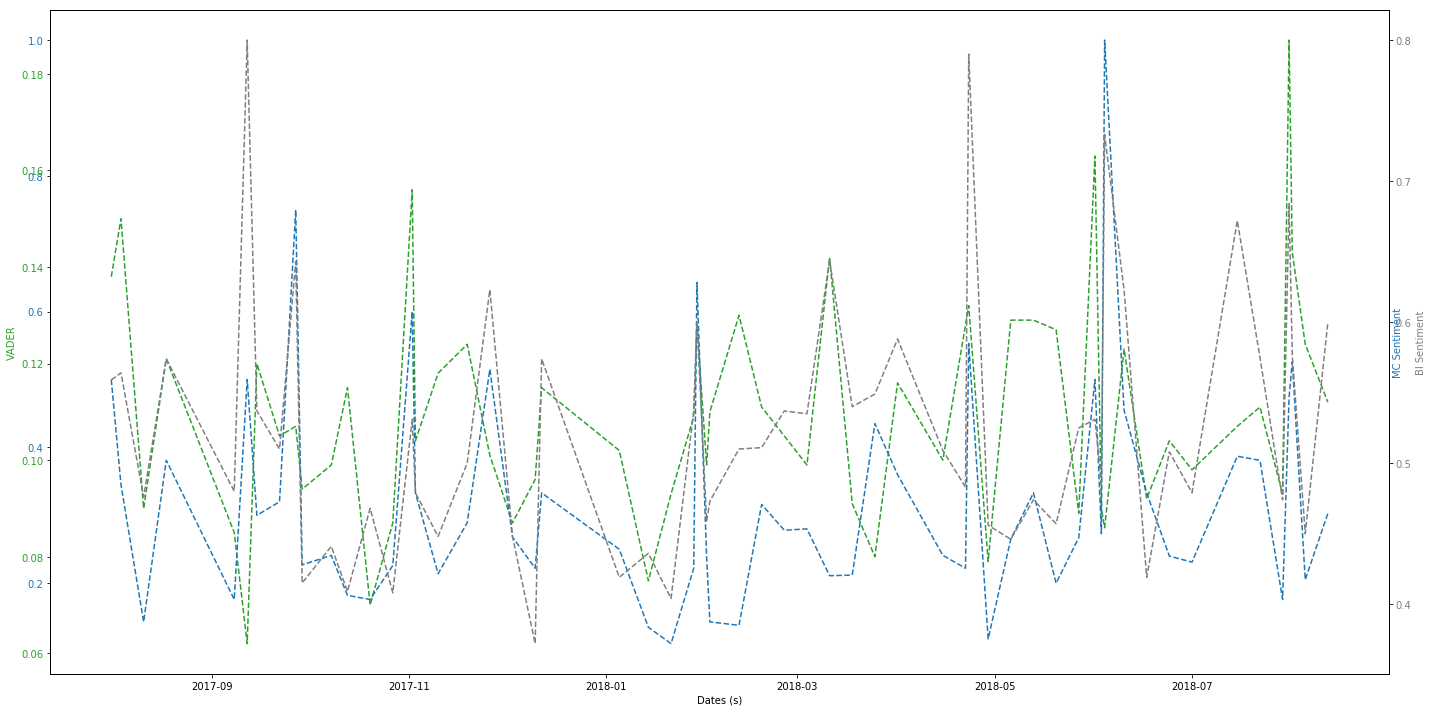

In [89]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:green'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('VADER', color=color)
ax1.plot(data['Date'], data['v_positive'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  

color = 'tab:grey'
ax3.set_ylabel('BI Sentiment', color=color)  
ax3.plot(data['Date'], data['bi_sentiment'], color=color,linestyle='--')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout() 

plt.savefig('VADERvsMcDonaldvsBingLiuDeutscheReports.png')

Comparison between VADER, McDonald and Bing Liu sentiment for Apple Financial Reports

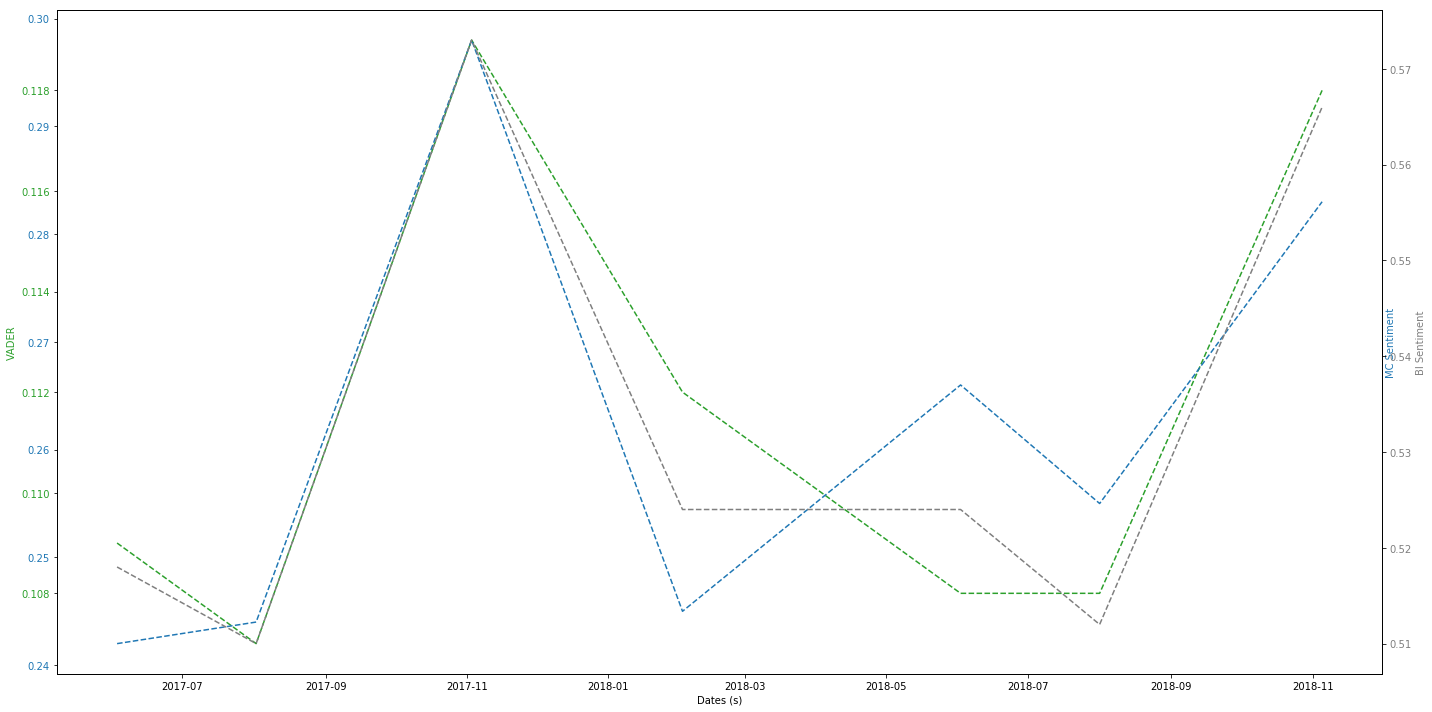

In [72]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:green'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('VADER', color=color)
ax1.plot(datax['Date'], datax['v_positive'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(datax['Date'], datax['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax2.twinx()  

color = 'tab:grey'
ax3.set_ylabel('BI Sentiment', color=color)  
ax3.plot(datax['Date'], datax['bi_sentiment'], color=color,linestyle='--')
ax3.tick_params(axis='y', labelcolor=color)

fig.tight_layout()


plt.savefig('VADERvsMcDonaldvsBingLiuAppleFinancialReports.png')

Comparison between Price and McDonald Sentiment for Deustche Bank Report

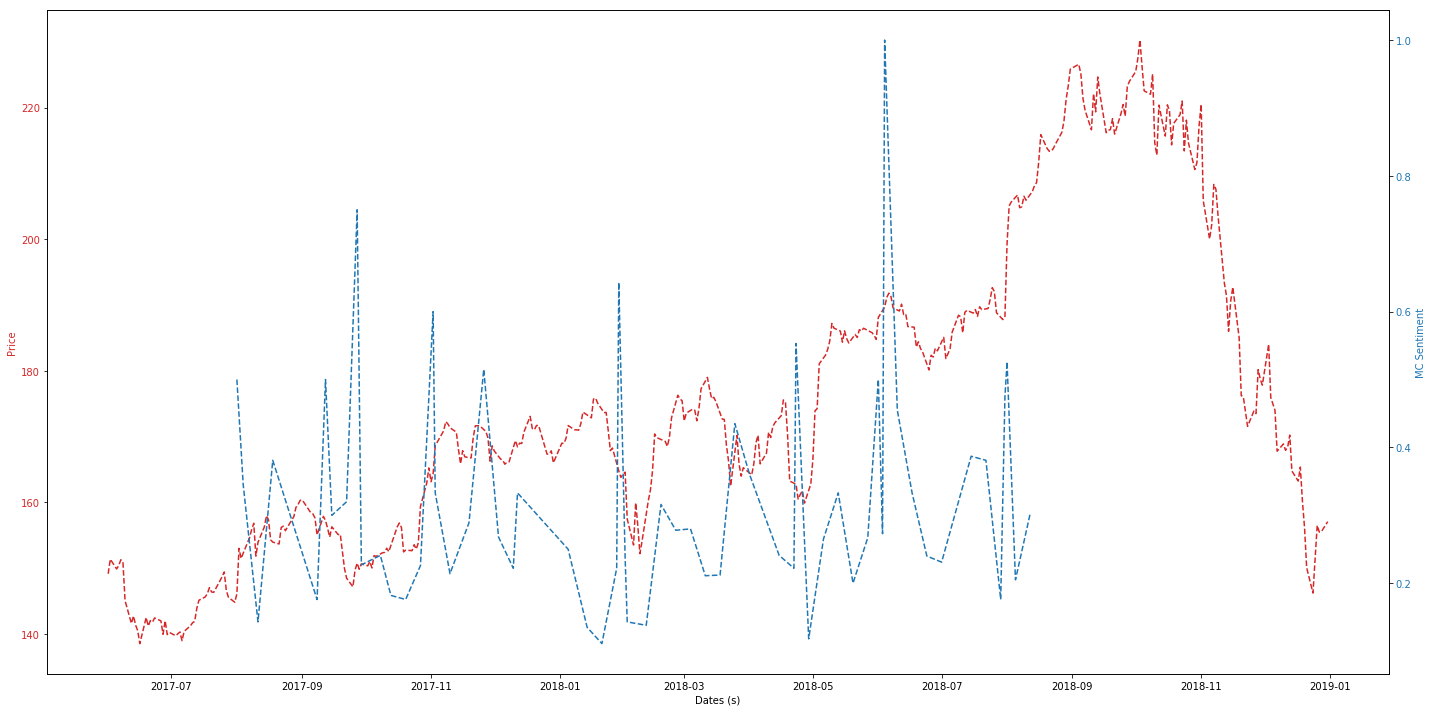

In [73]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLPricevsMcDonaldDeutscheReports.png')

Comparison between Volume and McDonald Sentiment for Deutsche Bank Report

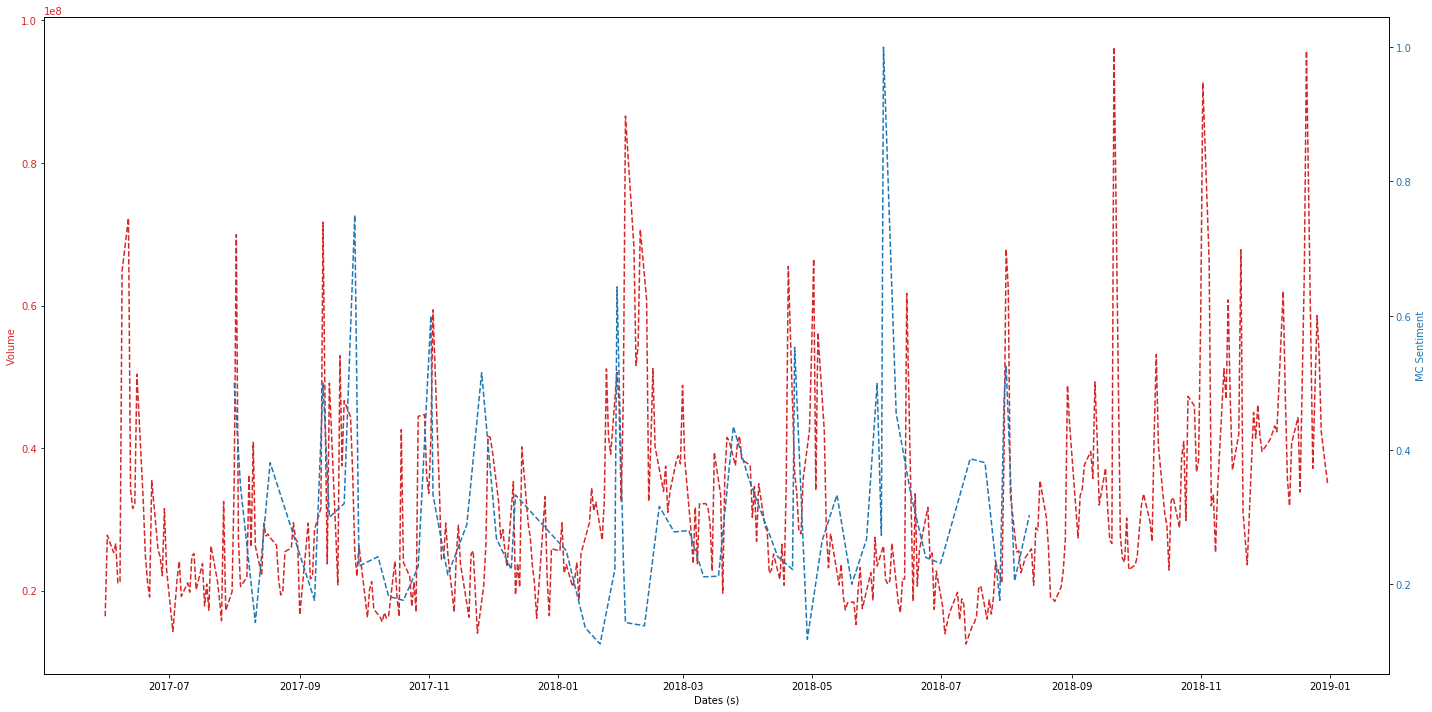

In [74]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Volume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLVolumevsMcDonaldDeutscheReports.png')

Comparison between Price and McDonald Sentiment for Apple Financial Statements

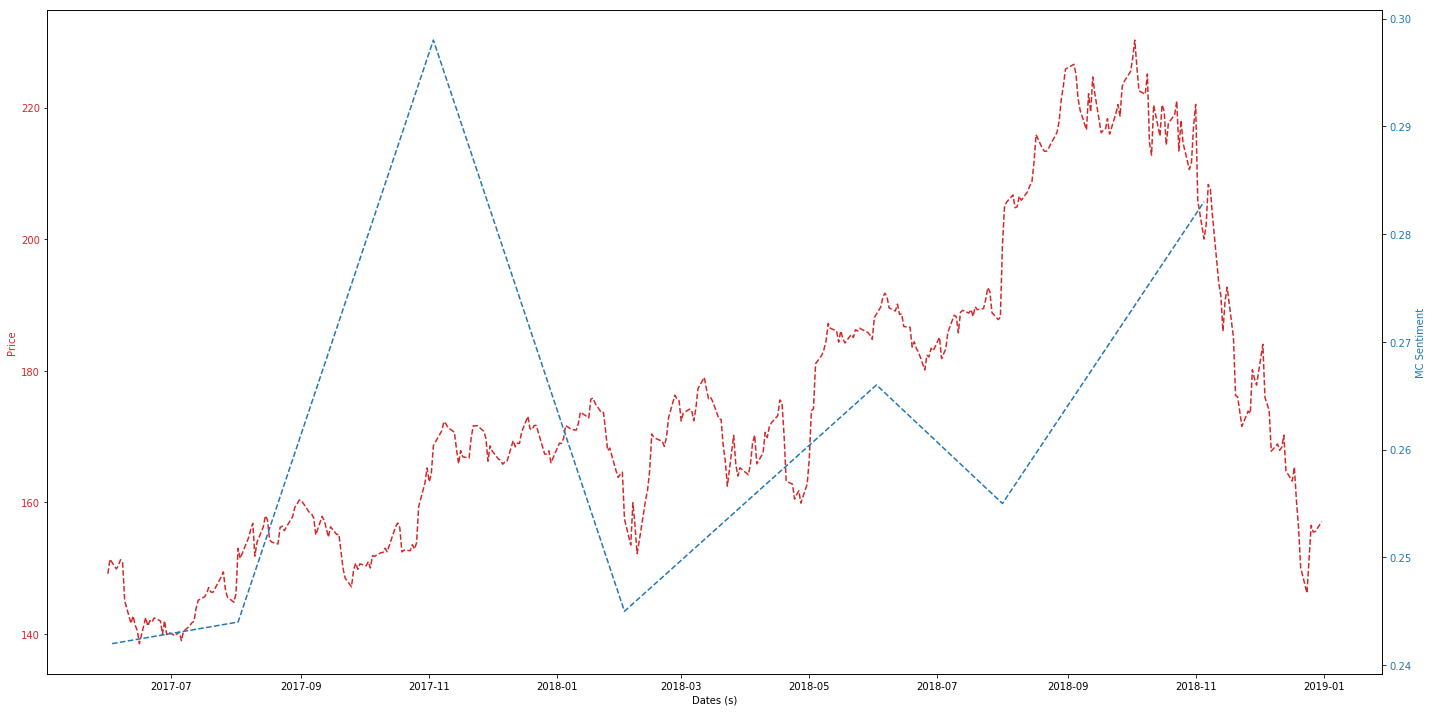

In [75]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color) 
ax2.plot(datax['Date'], datax['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLPricevsMcDonaldAppleFinancialReports.png')

Comparison between Volume and McDonald Sentiment for Apple Financial Statements

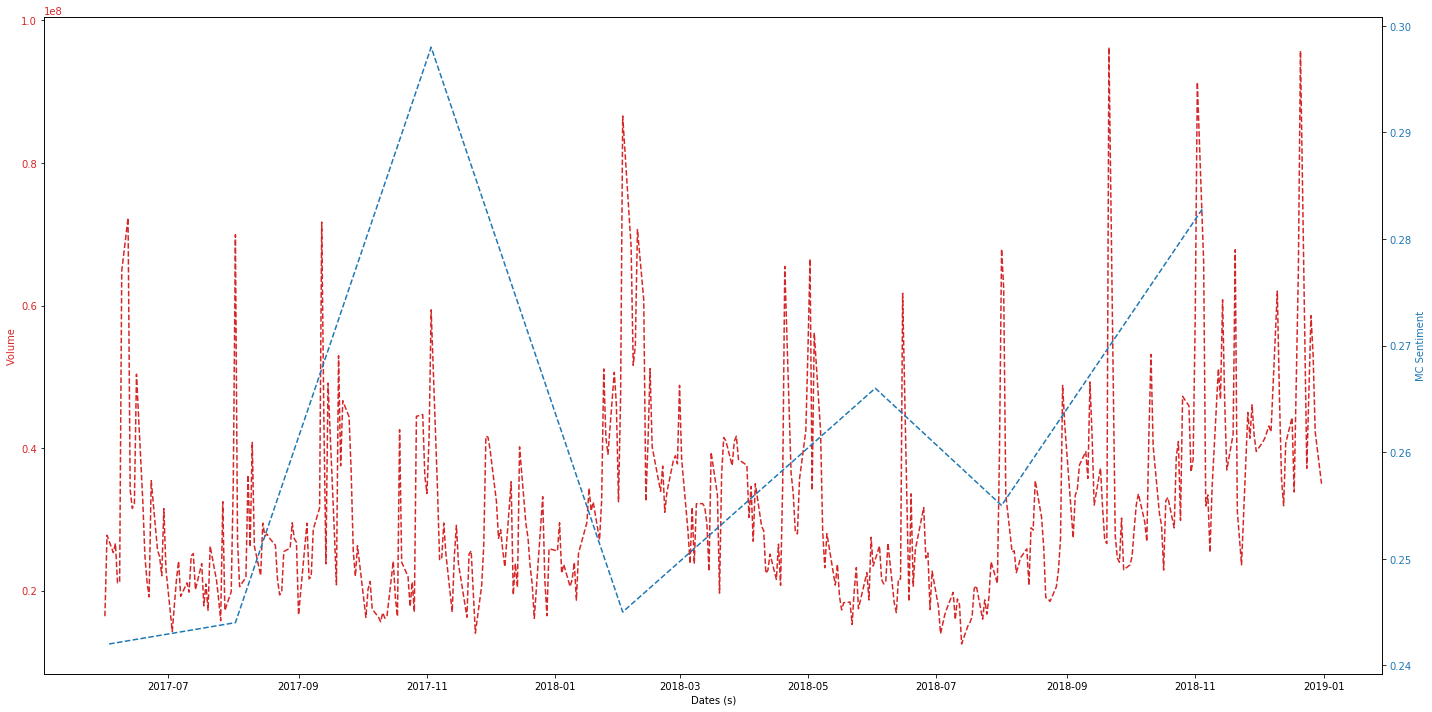

In [76]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Volume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(datax['Date'], datax['mc_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLVolumevsMcDonaldAppleFinancialReports.png')

Comparison between Price and Bing Liu Sentiment for Deutsche Bank Reports

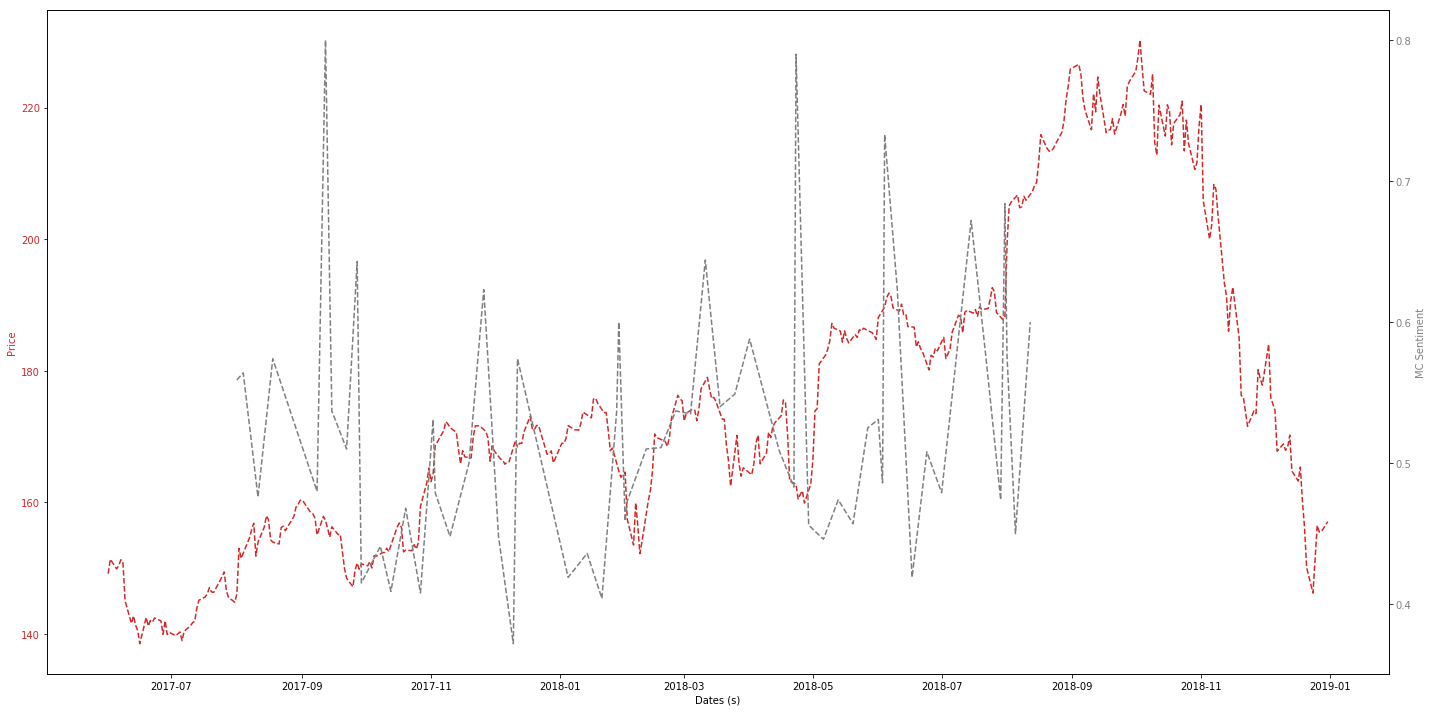

In [77]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:grey'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['bi_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLPricevsBingDeutscheReports.png')

Comparison between Volume and Bing Liu Sentiment for Deutsche Bank Reports

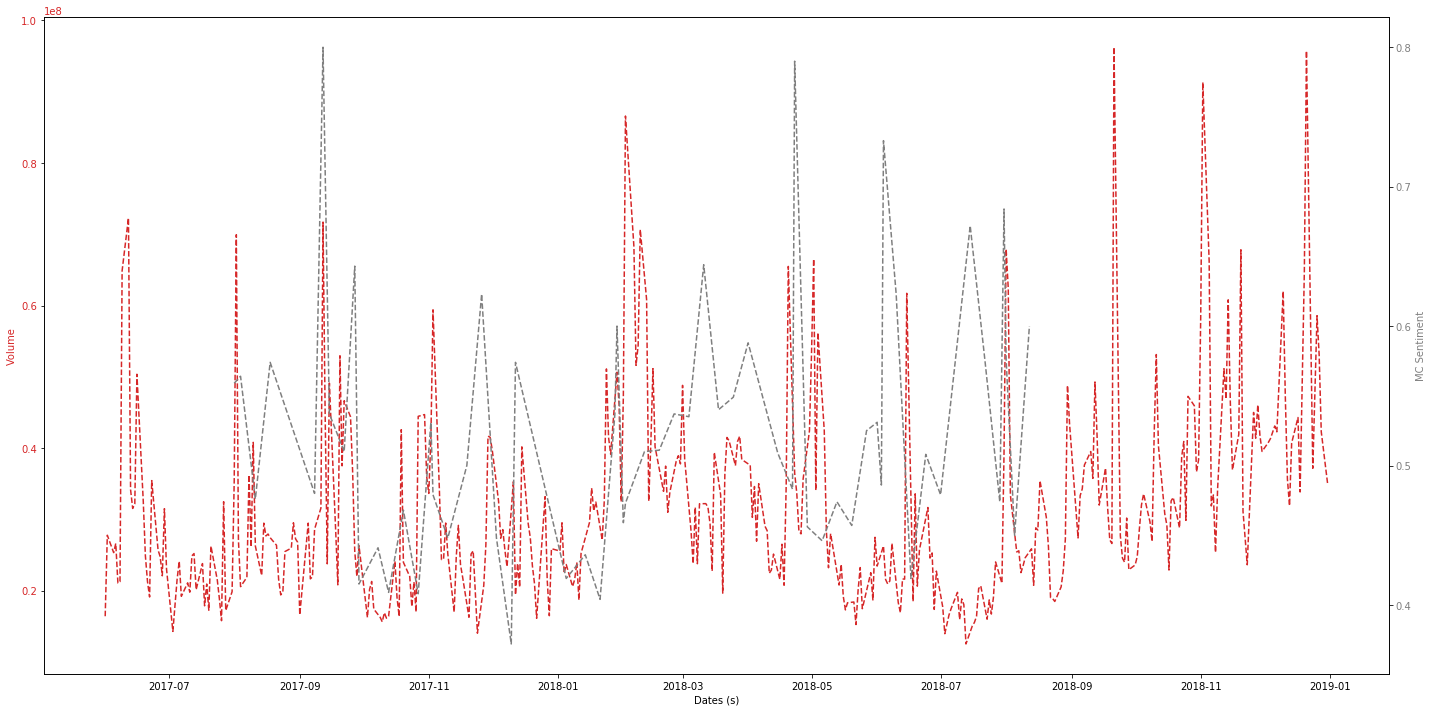

In [78]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Volume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:grey'
ax2.set_ylabel('MC Sentiment', color=color) 
ax2.plot(data['Date'], data['bi_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 


plt.savefig('AAPLVolumevsBingDeutscheReports.png')

Comparison between Price and Bing Liu Sentiment for Apple Financial Statements

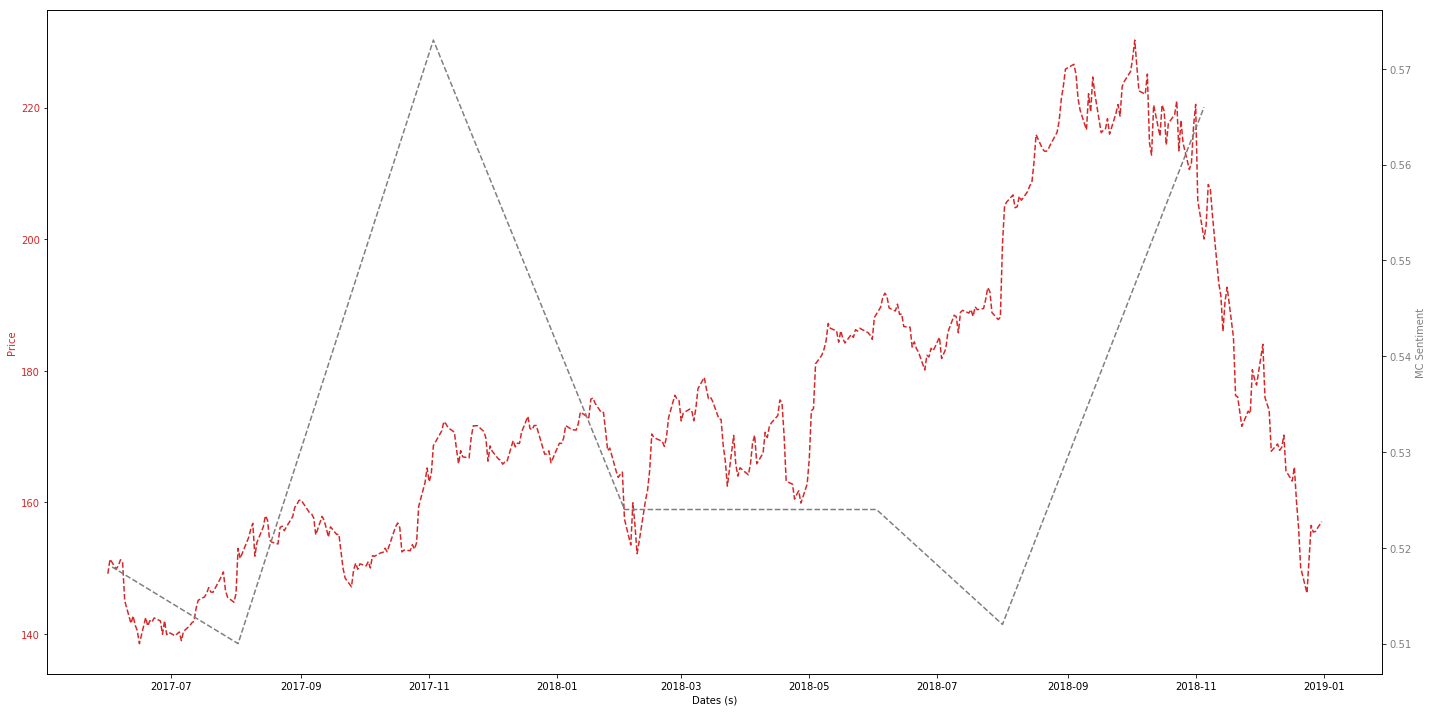

In [79]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:grey'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(datax['Date'], datax['bi_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLPricevsBingAppleFinancialReports.png')

Comparison between Volume and Bing Liu Sentiment for Apple Financial Statements

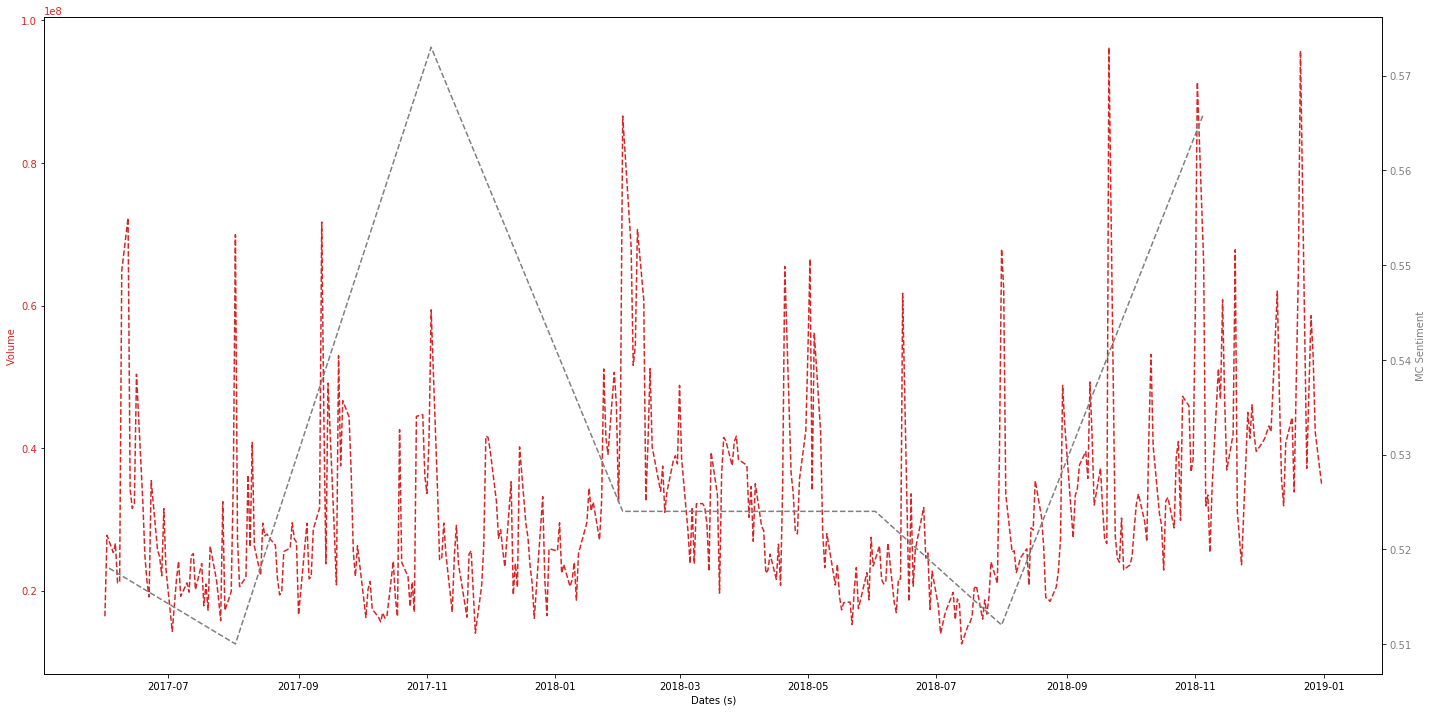

In [80]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Volume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:grey'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(datax['Date'], datax['bi_sentiment'], color=color,linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)


fig.tight_layout() 

plt.savefig('AAPLVolumevsBingAppleFinancialReports.png')

Comparison between Price and VADER Sentiment for Deutsche Bank Reports

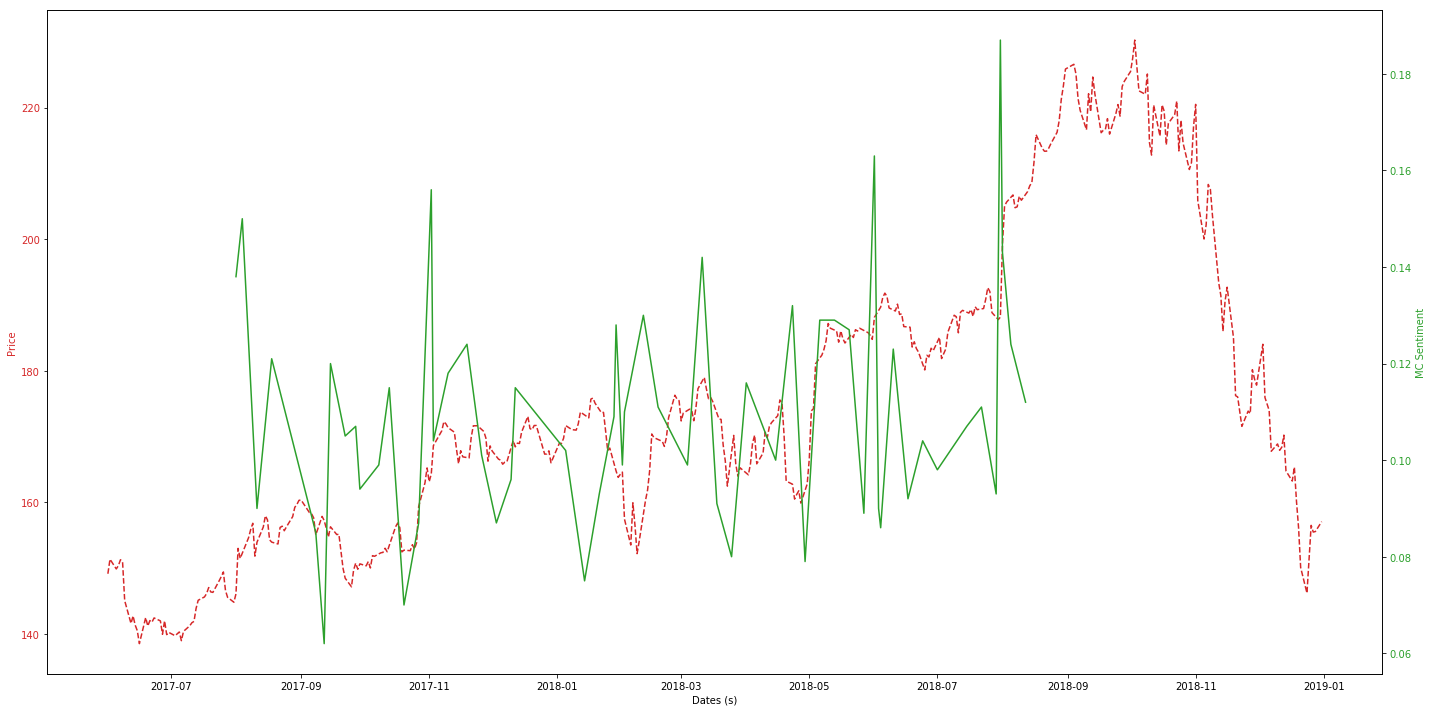

In [81]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['v_positive'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 


plt.savefig('AAPLPricevsVADERDeutscheReports.png')

Comparison between Volume and VADER Sentiment for Deutsche Bank Reports

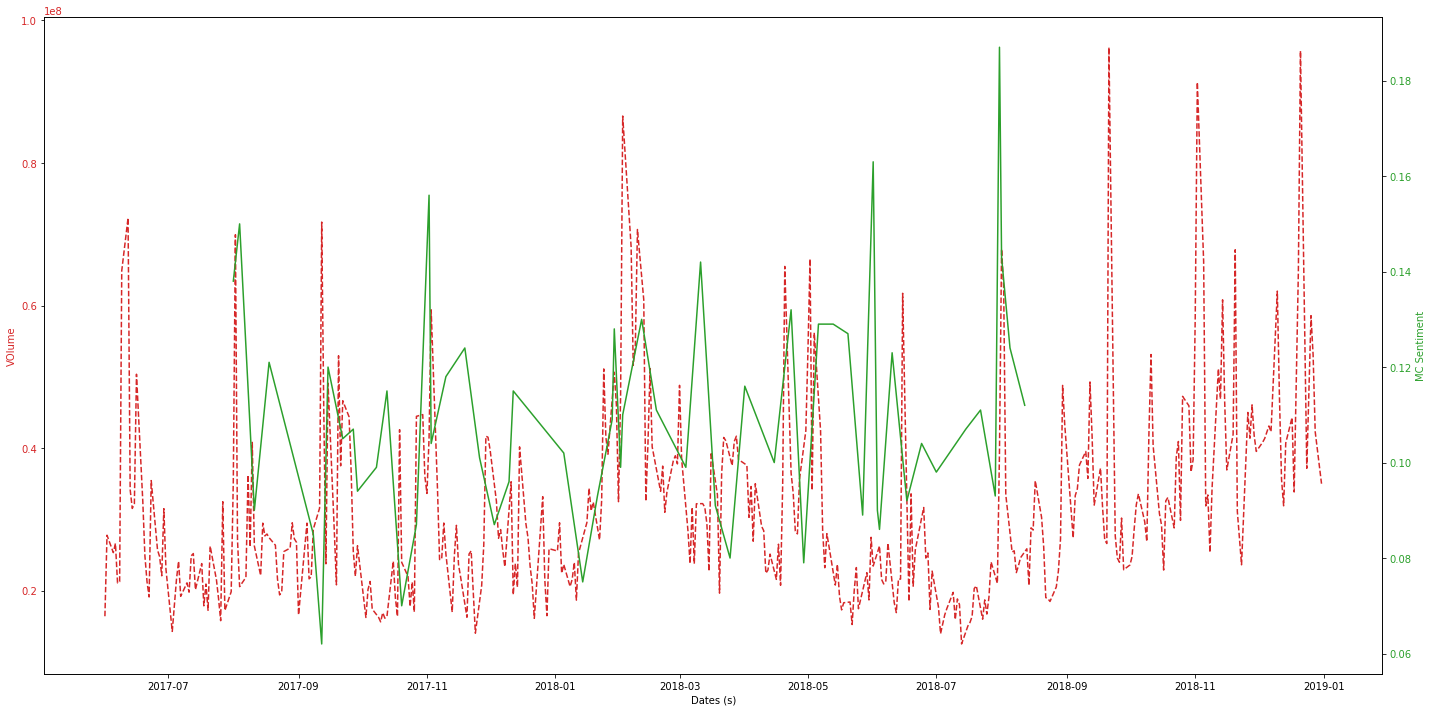

In [82]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('VOlume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(data['Date'], data['v_positive'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 


plt.savefig('AAPLVolumevsVADERDeutscheReports.png')

Comparison between Price and VADER Sentiment for Apple Financial Statements

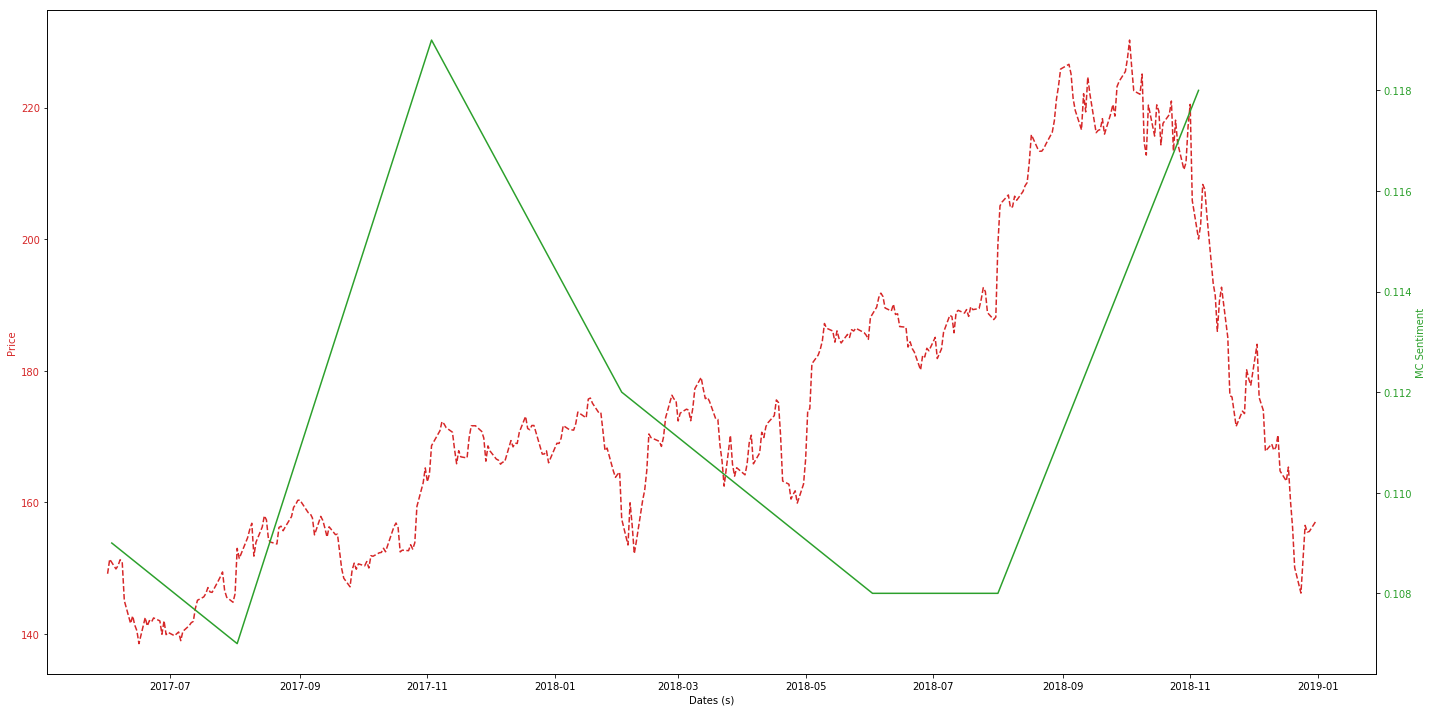

In [83]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(datay['Date'], datay['Adj Close'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  

color = 'tab:green'
ax2.set_ylabel('MC Sentiment', color=color)  
ax2.plot(datax['Date'], datax['v_positive'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 


plt.savefig('AAPLPricevsVADERAppleFinancialReports.png')

Comparison between Volume and VADER Sentiment for Apple Financial Reports

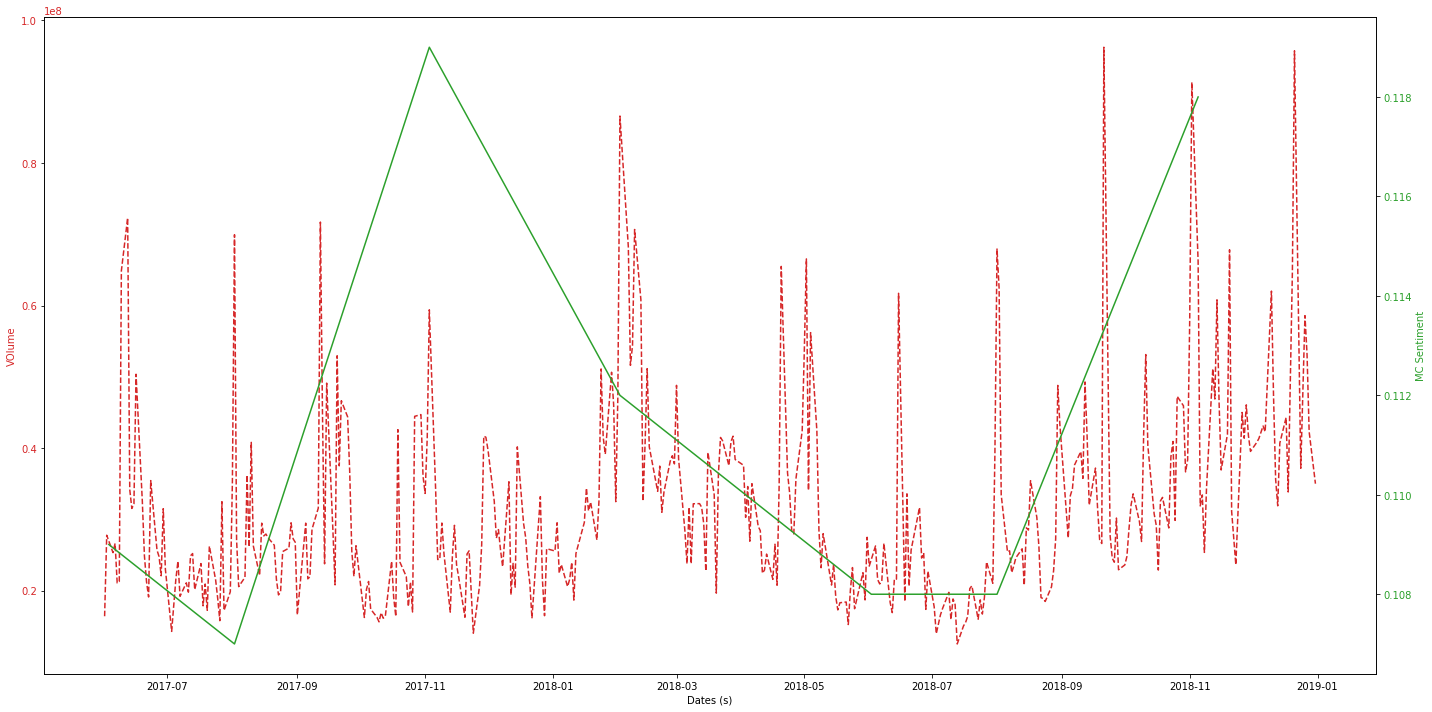

In [84]:
fig, ax1 = plt.subplots(figsize=(20, 10))


color = 'tab:red'
ax1.set_xlabel('Dates (s)')
ax1.set_ylabel('VOlume', color=color)
ax1.plot(datay['Date'], datay['Volume'], color=color,linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx() 

color = 'tab:green'
ax2.set_ylabel('MC Sentiment', color=color) 
ax2.plot(datax['Date'], datax['v_positive'], color=color)
ax2.tick_params(axis='y', labelcolor=color)



fig.tight_layout() 

plt.savefig('AAPLVolumevsVADERAppleFinancialReports.png')